# Missing Values

In this assignment, you'll be working with the U.S. Education Dataset from Kaggle. The data gives detailed, state-level information on several facets of the state of education on an annual basis. To learn more about the data and the column descriptions, click the Kaggle link above.

To complete this assignment, submit a link to a Jupyter Notebook containing your solutions to the following tasks:

Determine all the variable types and find the fraction of the missing values for each variable. Answer the following questions as you work through this challenge, and then paste a link to your Notebook.

Notice that the data has a time dimension (year). For this assignment, forget about time and treat all the observations as if they're from the same year. Choose a strategy to deal with the missing values for each variable. For which variables would filling in the missing values with some value make sense? For which might tossing out the records entirely make sense?

Now, take into account the time factor. Replicate your second answer, but this time, fill in the missing values by using a statistic that is calculated within the year of the observation. For example, if you want to fill in a missing value for a variable with the mean of that variable, calculate the mean by using only the observations for that specific year.

This time, fill in the missing values using interpolation (extrapolation).

Compare your results for the second, third, and fourth questions. Do you find any meaningful differences?

In [256]:
import pandas as pd
import numpy as np

In [257]:
import pandas as pd

# Add a column for outlier
# Can sort the values
def info_about_columns(dataframe, data_science_descriptions):
    '''
        A reusable function that will create a dataframe to contain in another 
        dataframe the following : dataypes, Number of Unique Categories, Categories 
        per sample and the type of variable missing values and missing values %
        
        input : A dataframe where data and categories will be retrieved
        seris : The data science explamation for each data type
    '''
        
    if data_science_descriptions == None:
        data_science_descriptions = education_dataframe.copy().dtypes
        data_science_descriptions = \
            data_science_descriptions.replace(data_science_descriptions.to_list(), "NA")
                 
#     dataframe_info_about_columns = pd.concat([
#         education_dataframe.dtypes, 
#         education_dataframe.nunique(), 
#         round(education_dataframe.nunique()*100/len(dataframe)),
#         data_science_descriptions,
#         education_dataframe.isna().sum(),
#         education_dataframe.isna().sum() * 100 / len(education_dataframe)], axis=1),

#     dataframe_info_about_columns.columns=[
#                                     'DataType', 
#                                     '# of Categories', 
#                                     'categories/sample ratio', 
#                                     'variable types', 'Data Science Type',
#                                     'missing values',
#                                     'missing values %']

    dataframe_info_about_columns = pd.DataFrame()
    dataframe_info_about_columns['DataTypes'] = dataframe.dtypes
    dataframe_info_about_columns['# of Categories'] = dataframe.nunique()
    dataframe_info_about_columns['Data Science Description'] = data_science_descriptions
    dataframe_info_about_columns['categories/sample ratio'] =  round(dataframe.nunique()*100/len(dataframe))
    dataframe_info_about_columns['missing values'] = dataframe.isna().sum()
    dataframe_info_about_columns['missing values %'] = dataframe.isna().sum() * 100 / len(education_dataframe)
    


    
    
    return dataframe_info_about_columns

In [258]:
education_dataframe = pd.read_csv('states_all.csv')

In [259]:
education_dataframe[95:100]

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
95,1993_UTAH,UTAH,1993,462323.0,1638305.0,116791.0,928596.0,592918.0,1665011.0,881924.0,...,35467.0,38031.0,31692.0,NaN,NaN,471365.0,NaN,NaN,NaN,NaN
96,1993_VERMONT,VERMONT,1993,97454.0,837540.0,34179.0,216778.0,586583.0,809853.0,405876.0,...,8457.0,7496.0,6227.0,NaN,NaN,102755.0,NaN,NaN,NaN,NaN
97,1993_VIRGINIA,VIRGINIA,1993,1032842.0,5918536.0,365601.0,2358711.0,3194224.0,5955333.0,3121277.0,...,81615.0,78443.0,60314.0,NaN,NaN,1045471.0,NaN,NaN,NaN,NaN
98,1993_WASHINGTON,WASHINGTON,1993,896197.0,5270961.0,284396.0,3720223.0,1266342.0,5791436.0,2778268.0,...,73824.0,70666.0,55847.0,NaN,NaN,915952.0,NaN,NaN,NaN,NaN
99,1993_WEST_VIRGINIA,WEST_VIRGINIA,1993,317719.0,1832154.0,140913.0,1220263.0,470978.0,1829848.0,1023497.0,...,22349.0,25677.0,21507.0,NaN,NaN,314383.0,NaN,NaN,NaN,NaN


In [260]:
# Get information about variables
info_about_columns(education_dataframe, None)

,DataTypes,# of Categories,Data Science Description,categories/sample ratio,missing values,missing values %
PRIMARY_KEY,object,1715,NA,100.0,0,0.000000
STATE,object,53,NA,3.0,0,0.000000
YEAR,int64,33,NA,2.0,0,0.000000
ENROLL,float64,1224,NA,71.0,491,28.629738
TOTAL_REVENUE,float64,1274,NA,74.0,440,25.655977
FEDERAL_REVENUE,float64,1275,NA,74.0,440,25.655977
STATE_REVENUE,float64,1251,NA,73.0,440,25.655977
LOCAL_REVENUE,float64,1275,NA,74.0,440,25.655977
TOTAL_EXPENDITURE,float64,1275,NA,74.0,440,25.655977
INSTRUCTION_EXPENDITURE,float64,1275,NA,74.0,440,25.655977


In [261]:
education_dataframe.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1715.000000,1.224000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.224000e+03,...,1632.000000,1632.000000,1632.000000,1.020000e+03,1.071000e+03,1.632000e+03,565.000000,602.000000,650.000000,562.000000
mean,2002.075219,9.175416e+05,9.102045e+06,7.677799e+05,4.223743e+06,4.110522e+06,9.206242e+06,4.768010e+06,2.682587e+06,4.299509e+05,...,69166.507966,68106.537377,58420.870711,5.779547e+05,2.820691e+05,9.139695e+05,236.327434,278.280731,218.806154,263.558719
std,9.568621,1.066514e+06,1.175962e+07,1.146992e+06,5.549735e+06,5.489562e+06,1.199279e+07,6.300569e+06,3.357214e+06,5.347893e+05,...,79957.990356,77965.847263,67438.530709,6.757837e+05,3.307098e+05,1.055893e+06,9.285505,10.343482,7.681805,6.612601
min,1986.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,...,4577.000000,3371.000000,2572.000000,3.769800e+04,1.353000e+04,6.844900e+04,192.000000,231.000000,179.000000,236.000000
25%,1994.000000,2.645145e+05,2.189504e+06,1.899575e+05,1.165776e+06,7.151210e+05,2.170404e+06,1.171336e+06,6.380760e+05,1.034492e+05,...,18971.500000,19594.250000,16076.500000,1.649250e+05,8.060800e+04,2.480832e+05,232.000000,272.000000,215.000000,260.000000
50%,2002.000000,6.499335e+05,5.085826e+06,4.035480e+05,2.537754e+06,2.058996e+06,5.242672e+06,2.658253e+06,1.525471e+06,2.717040e+05,...,49087.000000,47880.000000,39408.000000,4.051115e+05,1.869190e+05,6.458050e+05,238.000000,280.500000,220.000000,265.000000
75%,2010.000000,1.010532e+06,1.084516e+07,8.279320e+05,5.055548e+06,4.755293e+06,1.074420e+07,5.561959e+06,3.222924e+06,5.172222e+05,...,78504.250000,78976.000000,69397.250000,6.439752e+05,3.223280e+05,1.043420e+06,242.000000,286.000000,224.000000,268.000000
max,2019.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.000000,500143.000000,498403.000000,3.929869e+06,2.013687e+06,6.441557e+06,253.000000,301.000000,237.000000,280.000000


## Forget about a time and use a strategy to get rid of missing values

Notice that the data has a time dimension (year). For this assignment, forget about time and treat all the observations as if they're from the same year. Choose a strategy to deal with the missing values for each variable. For which variables would filling in the missing values with some value make sense? For which might tossing out the records entirely make sense?


In [262]:
education_dataframe_1 = education_dataframe.copy(deep=True)
education_dataframe_1 = education_dataframe_1.dropna(axis='columns', thresh=round(len(education_dataframe_1)/2))

In [263]:
info_about_columns(education_dataframe_1, None)

,DataTypes,# of Categories,Data Science Description,categories/sample ratio,missing values,missing values %
PRIMARY_KEY,object,1715,NA,100.0,0,0.000000
STATE,object,53,NA,3.0,0,0.000000
YEAR,int64,33,NA,2.0,0,0.000000
ENROLL,float64,1224,NA,71.0,491,28.629738
TOTAL_REVENUE,float64,1274,NA,74.0,440,25.655977
FEDERAL_REVENUE,float64,1275,NA,74.0,440,25.655977
STATE_REVENUE,float64,1251,NA,73.0,440,25.655977
LOCAL_REVENUE,float64,1275,NA,74.0,440,25.655977
TOTAL_EXPENDITURE,float64,1275,NA,74.0,440,25.655977
INSTRUCTION_EXPENDITURE,float64,1275,NA,74.0,440,25.655977


In [264]:
education_dataframe_1.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G
count,1715.000000,1.224000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.224000e+03,1.275000e+03,1542.000000,1632.000000,1632.000000,1632.000000,1632.000000,1.020000e+03,1.071000e+03,1.632000e+03
mean,2002.075219,9.175416e+05,9.102045e+06,7.677799e+05,4.223743e+06,4.110522e+06,9.206242e+06,4.768010e+06,2.682587e+06,4.299509e+05,9.034675e+05,17840.958495,68810.962010,69166.507966,68106.537377,58420.870711,5.779547e+05,2.820691e+05,9.139695e+05
std,9.568621,1.066514e+06,1.175962e+07,1.146992e+06,5.549735e+06,5.489562e+06,1.199279e+07,6.300569e+06,3.357214e+06,5.347893e+05,1.329473e+06,30016.603510,80671.033008,79957.990356,77965.847263,67438.530709,6.757837e+05,3.307098e+05,1.055893e+06
min,1986.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,1.270800e+04,96.000000,5122.000000,4577.000000,3371.000000,2572.000000,3.769800e+04,1.353000e+04,6.844900e+04
25%,1994.000000,2.645145e+05,2.189504e+06,1.899575e+05,1.165776e+06,7.151210e+05,2.170404e+06,1.171336e+06,6.380760e+05,1.034492e+05,1.815070e+05,2199.750000,19029.750000,18971.500000,19594.250000,16076.500000,1.649250e+05,8.060800e+04,2.480832e+05
50%,2002.000000,6.499335e+05,5.085826e+06,4.035480e+05,2.537754e+06,2.058996e+06,5.242672e+06,2.658253e+06,1.525471e+06,2.717040e+05,5.104280e+05,8258.000000,48122.000000,49087.000000,47880.000000,39408.000000,4.051115e+05,1.869190e+05,6.458050e+05
75%,2010.000000,1.010532e+06,1.084516e+07,8.279320e+05,5.055548e+06,4.755293e+06,1.074420e+07,5.561959e+06,3.222924e+06,5.172222e+05,9.661480e+05,22691.750000,78864.250000,78504.250000,78976.000000,69397.250000,6.439752e+05,3.223280e+05,1.043420e+06
max,2019.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,1.022366e+07,256222.000000,535379.000000,493415.000000,500143.000000,498403.000000,3.929869e+06,2.013687e+06,6.441557e+06


## Now, take into account the time factor and use the mean.

Replicate your second answer, but this time, fill in the missing values by using a statistic that is calculated within the year of the observation. For example, if you want to fill in a missing value for a variable with the mean of that variable, calculate the mean by using only the observations for that specific year.

In [265]:
education_dataframe.shape

(1715, 25)

In [266]:
# Fill in using the median
# We are using the numeric_only since not all columns are number, some are categorical
# Median or outliers -- Should have determined that by using the z-score
education_dataframe_2 = education_dataframe.copy(deep=True)
education_dataframe_2 = education_dataframe_2.fillna(education_dataframe_2.median(numeric_only=True))

In [267]:
info_about_columns(education_dataframe_2, None)

,DataTypes,# of Categories,Data Science Description,categories/sample ratio,missing values,missing values %
PRIMARY_KEY,object,1715,NA,100.0,0,0.0
STATE,object,53,NA,3.0,0,0.0
YEAR,int64,33,NA,2.0,0,0.0
ENROLL,float64,1225,NA,71.0,0,0.0
TOTAL_REVENUE,float64,1274,NA,74.0,0,0.0
FEDERAL_REVENUE,float64,1275,NA,74.0,0,0.0
STATE_REVENUE,float64,1251,NA,73.0,0,0.0
LOCAL_REVENUE,float64,1275,NA,74.0,0,0.0
TOTAL_EXPENDITURE,float64,1275,NA,74.0,0,0.0
INSTRUCTION_EXPENDITURE,float64,1275,NA,74.0,0,0.0


In [268]:
education_dataframe_2.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1715.000000,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,...,1715.000000,1715.000000,1715.000000,1.715000e+03,1.715000e+03,1.715000e+03,1715.000000,1715.000000,1715.000000,1715.000000
mean,2002.075219,8.409261e+05,8.071645e+06,6.743326e+05,3.791186e+06,3.584183e+06,8.189349e+06,4.226732e+06,2.385717e+06,3.846453e+05,...,68194.730029,67127.643732,57500.714286,5.079104e+05,2.463393e+05,9.009913e+05,237.448980,279.720991,219.547522,264.527697
std,9.568621,9.089854e+05,1.028917e+07,1.001591e+06,4.841024e+06,4.816898e+06,1.048349e+07,5.509629e+06,2.938210e+06,4.573738e+05,...,78117.005891,76178.524321,65911.908766,5.279302e+05,2.653303e+05,1.031617e+06,5.384205,6.215863,4.762313,3.843150
min,1986.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,...,4577.000000,3371.000000,2572.000000,3.769800e+04,1.353000e+04,6.844900e+04,192.000000,231.000000,179.000000,236.000000
25%,1994.000000,4.646880e+05,2.992297e+06,2.602770e+05,1.618602e+06,1.162580e+06,3.004448e+06,1.570157e+06,8.996910e+05,1.624780e+05,...,20486.500000,20518.500000,17949.000000,3.158105e+05,1.457900e+05,2.800010e+05,238.000000,280.500000,220.000000,265.000000
50%,2002.000000,6.499335e+05,5.085826e+06,4.035480e+05,2.537754e+06,2.058996e+06,5.242672e+06,2.658253e+06,1.525471e+06,2.717040e+05,...,49087.000000,47880.000000,39408.000000,4.051115e+05,1.869190e+05,6.458050e+05,238.000000,280.500000,220.000000,265.000000
75%,2010.000000,8.694485e+05,8.165744e+06,6.732800e+05,3.837822e+06,3.484108e+06,8.220253e+06,4.133618e+06,2.442635e+06,4.079995e+05,...,77052.000000,76719.500000,68023.000000,4.815905e+05,2.528075e+05,1.002840e+06,238.000000,280.500000,220.000000,265.000000
max,2019.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.000000,500143.000000,498403.000000,3.929869e+06,2.013687e+06,6.441557e+06,253.000000,301.000000,237.000000,280.000000


## Now, take into account the time factor. 

Replicate your second answer, but this time, fill in the missing values by using a statistic that is calculated within the year of the observation. For example, if you want to fill in a missing value for a variable with the mean of that variable, calculate the mean by using only the observations for that specific year.

In [269]:
# Start with a new data frame and remove all values as was done before
education_dataframe_3 = education_dataframe.copy(deep=True)
info_about_columns(dataframe=education_dataframe_3, data_science_descriptions=None)

,DataTypes,# of Categories,Data Science Description,categories/sample ratio,missing values,missing values %
PRIMARY_KEY,object,1715,NA,100.0,0,0.000000
STATE,object,53,NA,3.0,0,0.000000
YEAR,int64,33,NA,2.0,0,0.000000
ENROLL,float64,1224,NA,71.0,491,28.629738
TOTAL_REVENUE,float64,1274,NA,74.0,440,25.655977
FEDERAL_REVENUE,float64,1275,NA,74.0,440,25.655977
STATE_REVENUE,float64,1251,NA,73.0,440,25.655977
LOCAL_REVENUE,float64,1275,NA,74.0,440,25.655977
TOTAL_EXPENDITURE,float64,1275,NA,74.0,440,25.655977
INSTRUCTION_EXPENDITURE,float64,1275,NA,74.0,440,25.655977


In [270]:
# Difference between Pivot Table and Cross Tab
# Data Types: Crosstabs are used for categorical data, while pivot tables can be used 
# for both categorical and numerical data. Crosstabs are used to analyze the relationship 
# between two categorical variables, while pivot tables can analyze the relationships 
# between multiple variables, both categorical and numerical.
#
# Pandas -- Crosstab dataframe pivot-- Dataframe, numpy

# Pivot Table -- Create a spreadsheet style pivot table as a DataFrame
# index -- keys to group by on the on the pivot table column
# value -- columns to aggregate
# aggfunc -- A list of functions passed 
#df_grouped_by_year = pd.pivot_table(data = education_dataframe_3, index='YEAR', values=education_dataframe_2, aggfunc = [np.median, len], dropna=True)
#df_grouped_by_year

## What is a groupby 

A groupby contains dictionary datastrucutre where:
> * key is category 
> * value is the list of rows where the column matches the key that match the key.

For example uncomment the follwing code ( The output is fairly large. )

In [271]:
#education_dataframe.groupby('YEAR').groups

In [272]:
# Create a copy of the dataframe that will be the answer
education_dataframe_3 = education_dataframe.copy(deep=True)
info_about_columns(dataframe=education_dataframe_3, data_science_descriptions=None)

,DataTypes,# of Categories,Data Science Description,categories/sample ratio,missing values,missing values %
PRIMARY_KEY,object,1715,NA,100.0,0,0.000000
STATE,object,53,NA,3.0,0,0.000000
YEAR,int64,33,NA,2.0,0,0.000000
ENROLL,float64,1224,NA,71.0,491,28.629738
TOTAL_REVENUE,float64,1274,NA,74.0,440,25.655977
FEDERAL_REVENUE,float64,1275,NA,74.0,440,25.655977
STATE_REVENUE,float64,1251,NA,73.0,440,25.655977
LOCAL_REVENUE,float64,1275,NA,74.0,440,25.655977
TOTAL_EXPENDITURE,float64,1275,NA,74.0,440,25.655977
INSTRUCTION_EXPENDITURE,float64,1275,NA,74.0,440,25.655977


In [274]:
# Create a copy of the dataframe that will be the answer
education_dataframe_3 = education_dataframe.copy(deep=True)

# Select the columns that will have the median applied for missing values
# Algorithm 
#    Must use the column variable or ValueError: Columns must be same length as key
#    .median did not work 
#
#    For each column that is np.float64
#       1. groupby year and get the median of the current YEAR which create a dataframe
#       2. Use the transform to apply the median and create a dataframe containing the 
#          default median for each category a column.
#            Transform -- A function that a execute a function for each row in the d
#                         dataframe and return a dataframe.
#       3. 
for column in education_dataframe.select_dtypes(np.float64):
         education_dataframe_3[column] = \
             education_dataframe[column].fillna(\
                         education_dataframe_3.groupby('YEAR')[column].transform('median'))
info_about_columns(dataframe=education_dataframe_3, data_science_descriptions=None)

,DataTypes,# of Categories,Data Science Description,categories/sample ratio,missing values,missing values %
PRIMARY_KEY,object,1715,NA,100.0,0,0.000000
STATE,object,53,NA,3.0,0,0.000000
YEAR,int64,33,NA,2.0,0,0.000000
ENROLL,float64,1224,NA,71.0,467,27.230321
TOTAL_REVENUE,float64,1274,NA,74.0,414,24.139942
FEDERAL_REVENUE,float64,1275,NA,74.0,414,24.139942
STATE_REVENUE,float64,1251,NA,73.0,414,24.139942
LOCAL_REVENUE,float64,1275,NA,74.0,414,24.139942
TOTAL_EXPENDITURE,float64,1275,NA,74.0,414,24.139942
INSTRUCTION_EXPENDITURE,float64,1275,NA,74.0,414,24.139942


In [275]:
np.unique(education_dataframe_3['AVG_READING_8_SCORE'].to_numpy(), return_counts=True)

(array([236. , 238. , 239. , 240. , 241. , 242. , 247. , 248. , 249. ,
        250. , 251. , 252. , 253. , 254. , 255. , 256. , 257. , 258. ,
        259. , 260. , 261. , 262. , 263. , 264. , 264.5, 265. , 266. ,
        267. , 268. , 269. , 270. , 271. , 272. , 273. , 274. , 275. ,
        276. , 277. , 278. , 280. ,   nan]),
 array([   1,    1,    1,    1,    1,    2,    1,    2,    2,    4,   10,
          11,   11,    5,   16,   12,   14,   23,   20,  131,   18,   43,
          29,   31,    9,   44,   33,   50,   44,   28,   31,   15,   12,
          11,    9,    6,    1,    3,    1,    2, 1026]))

In [276]:
#
# We will need a file with no missing data so lets save this version
# of the file
#
education_dataframe_2.to_csv("states_all_clean.csv", index=False)

## fill in the missing values using interpolation 

(extrapolation).


In [277]:
# Start with a new data frame and remove all values as was done before
education_dataframe_4 = education_dataframe.copy()
info_about_columns(dataframe=education_dataframe_4, data_science_descriptions=None)

,DataTypes,# of Categories,Data Science Description,categories/sample ratio,missing values,missing values %
PRIMARY_KEY,object,1715,NA,100.0,0,0.000000
STATE,object,53,NA,3.0,0,0.000000
YEAR,int64,33,NA,2.0,0,0.000000
ENROLL,float64,1224,NA,71.0,491,28.629738
TOTAL_REVENUE,float64,1274,NA,74.0,440,25.655977
FEDERAL_REVENUE,float64,1275,NA,74.0,440,25.655977
STATE_REVENUE,float64,1251,NA,73.0,440,25.655977
LOCAL_REVENUE,float64,1275,NA,74.0,440,25.655977
TOTAL_EXPENDITURE,float64,1275,NA,74.0,440,25.655977
INSTRUCTION_EXPENDITURE,float64,1275,NA,74.0,440,25.655977


In [278]:
education_dataframe_4 = education_dataframe_3.interpolate(method='linear', limit_direction='both')
education_dataframe_4

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,727716.0,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,472847.0,208148.0,731634.0,208.0,252.0,207.0,260.0
1,1992_ALASKA,ALASKA,1992,727716.0,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,472847.0,208148.0,122487.0,219.0,267.0,217.0,260.0
2,1992_ARIZONA,ARIZONA,1992,727716.0,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,472847.0,208148.0,673477.0,215.0,265.0,209.0,260.0
3,1992_ARKANSAS,ARKANSAS,1992,727716.0,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,472847.0,208148.0,441490.0,210.0,256.0,211.0,260.0
4,1992_CALIFORNIA,CALIFORNIA,1992,727716.0,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,472847.0,208148.0,5254844.0,208.0,261.0,202.0,260.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,671715.0,7548871.0,688990.0,4075118.0,2856603.0,7554887.0,3817479.0,...,52970.0,50627.0,46516.0,410676.0,198841.0,695092.0,247.0,287.0,224.0,262.0
1711,2019_WASHINGTON,WASHINGTON,2019,671715.0,7548871.0,688990.0,4075118.0,2856603.0,7554887.0,3817479.0,...,52970.0,50627.0,46516.0,410676.0,198841.0,695092.0,240.0,286.0,220.0,266.0
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,671715.0,7548871.0,688990.0,4075118.0,2856603.0,7554887.0,3817479.0,...,52970.0,50627.0,46516.0,410676.0,198841.0,695092.0,231.0,272.0,213.0,256.0
1713,2019_WISCONSIN,WISCONSIN,2019,671715.0,7548871.0,688990.0,4075118.0,2856603.0,7554887.0,3817479.0,...,52970.0,50627.0,46516.0,410676.0,198841.0,695092.0,242.0,289.0,220.0,267.0


In [279]:
info_about_columns(dataframe=education_dataframe_4, data_science_descriptions=None)

,DataTypes,# of Categories,Data Science Description,categories/sample ratio,missing values,missing values %
PRIMARY_KEY,object,1715,NA,100.0,0,0.0
STATE,object,53,NA,3.0,0,0.0
YEAR,int64,33,NA,2.0,0,0.0
ENROLL,float64,1585,NA,92.0,0,0.0
TOTAL_REVENUE,float64,1633,NA,95.0,0,0.0
FEDERAL_REVENUE,float64,1634,NA,95.0,0,0.0
STATE_REVENUE,float64,1610,NA,94.0,0,0.0
LOCAL_REVENUE,float64,1634,NA,95.0,0,0.0
TOTAL_EXPENDITURE,float64,1634,NA,95.0,0,0.0
INSTRUCTION_EXPENDITURE,float64,1634,NA,95.0,0,0.0


In [280]:
test=info_about_columns(dataframe=education_dataframe_4, data_science_descriptions=None)
test.loc['PRIMARY_KEY','DataTypes'] == np.object0

True

In [281]:
education_dataframe_4.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1715.000000,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,...,1715.000000,1715.000000,1715.000000,1.715000e+03,1.715000e+03,1.715000e+03,1715.000000,1715.000000,1715.000000,1715.000000
mean,2002.075219,7.715856e+05,7.595849e+06,6.354576e+05,3.575272e+06,3.385279e+06,7.686690e+06,3.961336e+06,2.242345e+06,3.524399e+05,...,68319.363848,67231.339942,57729.200583,4.800470e+05,2.690878e+05,9.027434e+05,230.286297,274.266181,218.555685,262.243149
std,9.568621,9.360273e+05,1.049913e+07,1.018833e+06,4.935600e+06,4.903255e+06,1.069852e+07,5.623364e+06,3.005947e+06,4.714790e+05,...,78089.685406,76154.449622,65862.422346,5.414207e+05,2.876752e+05,1.031227e+06,9.274902,8.494235,6.015027,5.375203
min,1986.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,...,4577.000000,3371.000000,2572.000000,3.769800e+04,1.353000e+04,6.844900e+04,192.000000,231.000000,179.000000,236.000000
25%,1994.000000,2.461598e+05,2.245286e+06,1.625863e+05,1.219642e+06,8.453270e+05,2.263424e+06,1.118647e+06,6.486688e+05,9.339132e+04,...,20486.500000,20518.500000,17949.000000,1.820880e+05,1.292975e+05,2.800010e+05,224.000000,268.940045,215.000000,258.879870
50%,2002.000000,4.994890e+05,3.589705e+06,3.041770e+05,1.958500e+06,1.382162e+06,3.616691e+06,1.860007e+06,1.075352e+06,2.037750e+05,...,50354.000000,49668.000000,40186.000000,3.926160e+05,2.081480e+05,6.661200e+05,229.230769,273.400000,219.103448,261.807692
75%,2010.000000,8.694485e+05,8.165744e+06,6.889900e+05,4.075118e+06,3.484108e+06,8.220253e+06,4.133618e+06,2.442635e+06,4.082920e+05,...,77052.000000,76719.500000,68023.000000,4.815905e+05,2.879430e+05,1.002840e+06,238.000000,280.769231,222.571429,266.142857
max,2019.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.000000,500143.000000,498403.000000,3.929869e+06,2.013687e+06,6.441557e+06,253.000000,301.000000,237.000000,280.000000


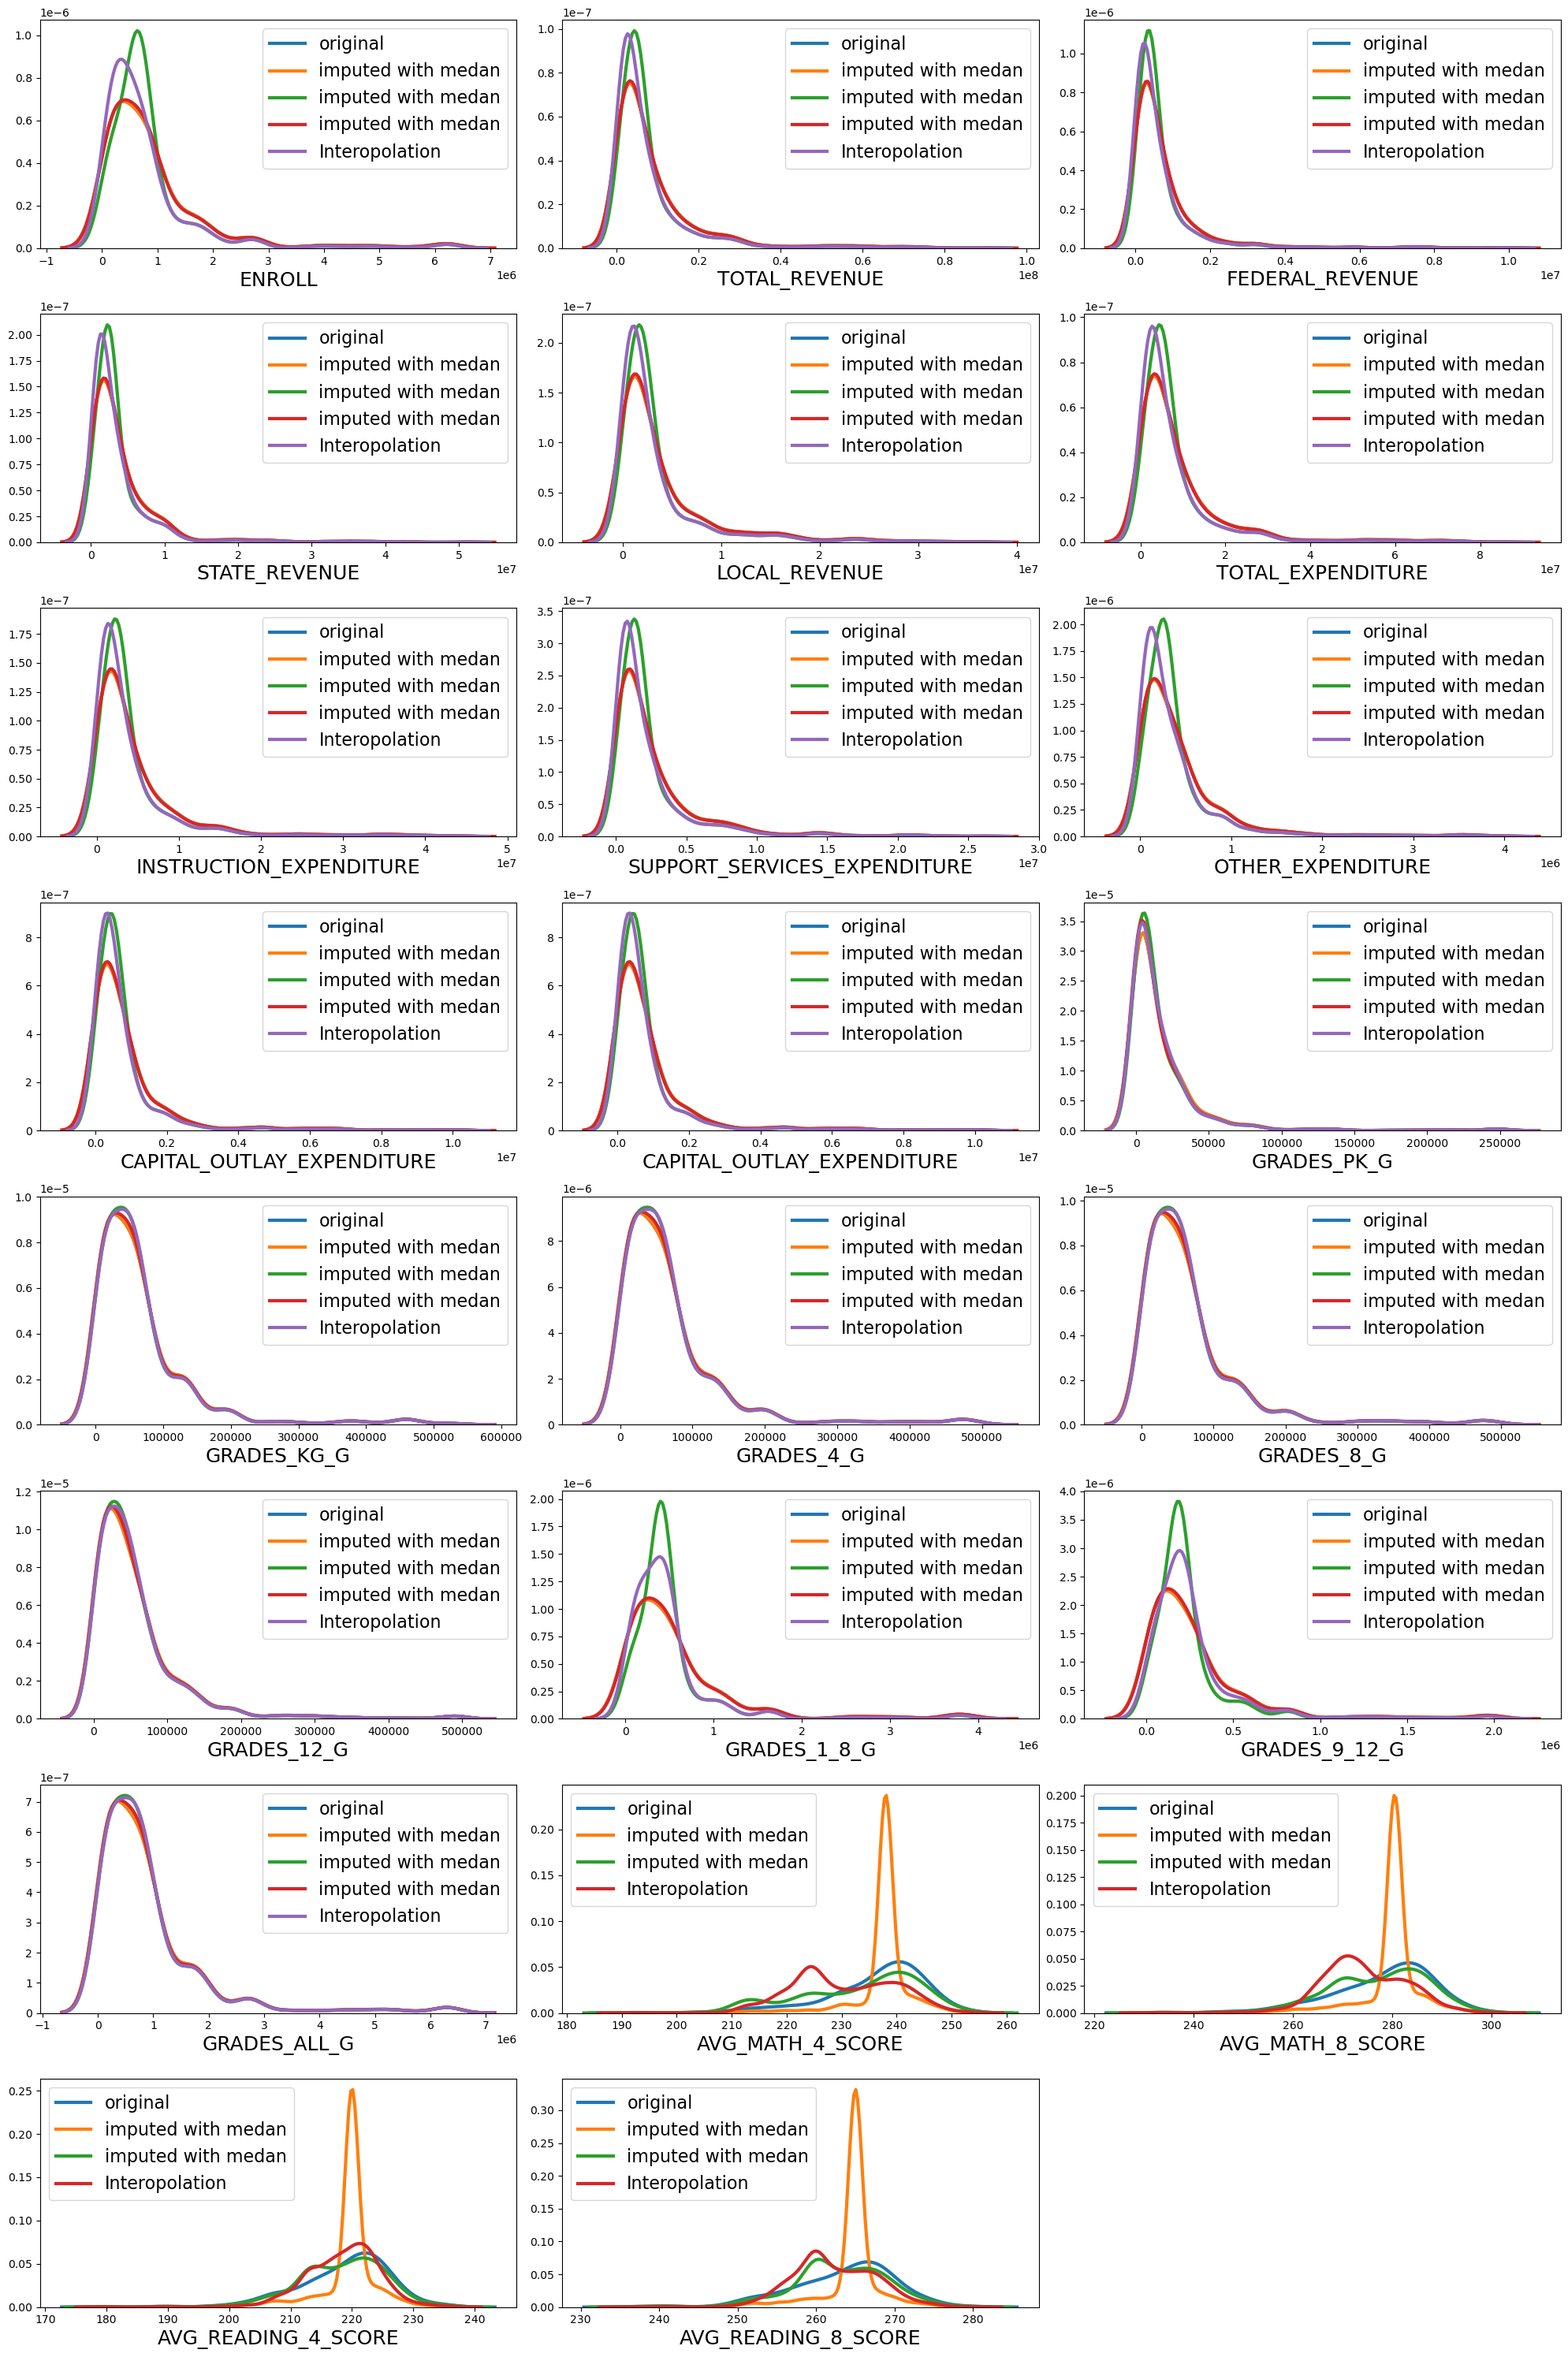

In [310]:
# Need to check the distribution of the data before and after the algorithm is applied.
# Ex. Local Revenue -- After replacing the mean of the data it is shifted towards the right
# If the difference is significient then it has changed the characteristic of the data.
# Can test the differences with hypothesis testing.  The group median is more accurate
# since it very close to the change data.  Also ignore the height.

# Question : Could we go over this section.  How you would do this in the real world.

import matplotlib.pyplot as plt
import seaborn as sns

info = info_about_columns(dataframe=education_dataframe, data_science_descriptions=None)

k = 0
plt.figure(figsize=(20,30))
for column in [ "ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE", "STATE_REVENUE", "LOCAL_REVENUE", \
                "TOTAL_EXPENDITURE", "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE", \
                "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE",
                "GRADES_PK_G", "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G", \
                "GRADES_9_12_G", "GRADES_ALL_G", "AVG_MATH_4_SCORE", "AVG_MATH_8_SCORE", "AVG_READING_4_SCORE",
                "AVG_READING_8_SCORE"]:
        k +=1
        plt.subplot(8,3,k)
    
        sns.kdeplot(education_dataframe[column], label='original', linewidth=3)
        
        if column in education_dataframe_1:
            sns.kdeplot(education_dataframe_1[column], label='imputed with medan', linewidth=3)
        
        sns.kdeplot(education_dataframe_2[column], label='imputed with medan', linewidth=3)
        sns.kdeplot(education_dataframe_3[column], label='imputed with medan', linewidth=3)
        sns.kdeplot(education_dataframe_4[column], label='Interopolation', linewidth=3)
    
        plt.xlabel(column, fontsize=18)
        plt.ylabel('', fontsize=18)
        plt.legend(fontsize=16)
        
plt.tight_layout()
plt.show()

## Compare your results for the second, third, and fourth questions.

This will come in handy when machine learning is done since GridSearchCv can be used to 
we can apply different strategies and verify which works best for the model.

See above for the answer.